In [59]:
import numpy as np
from scipy.io import loadmat
import tqdm
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
# %matplotlib inline

In [3]:
lettersData = loadmat("mnist_data/images.mat",mat_dtype=True)
training = lettersData['images']

In [4]:
trainingR = training.reshape((784,60000)).T
trainingR = scale(trainingR, axis=0)


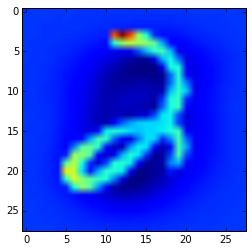

In [5]:
plt.imshow(trainingR[13000].reshape((28,28)))

In [6]:
def distance(a,b):
    return np.linalg.norm(a-b)
def findClosestCluster(datapoint, means):
    return np.argmin([distance(datapoint, means[i]) for i in range(k)])

In [7]:
# plt.imshow(trainingR[np.random.choice(trainingR.shape[0], k, replace=False)][9].reshape(28,28))
distance(trainingR[0], trainingR[2])

25.053327710778227

In [56]:
def update(datapoint, means, clusters, newMeans):
    inde = findClosestCluster(datapoint[:-1], means)
    clusters[inde].add(datapoint[-1])
    newMeans[inde] += datapoint[:-1]
    return 5
trainingLabeled = np.vstack((trainingR.T,range(60000))).T
print(trainingLabeled.shape)
k = 20
#init
# for i in range(k):
#     means.append(trainingR[i])
means = []
means = list(trainingR[np.random.choice(trainingR.shape[0], k, replace=False)])
# for i in range(k):
#     means.append(trainingR[i])
for _ in tqdm.tqdm(range(100)):
    clusters = []
    clusters = [set() for i in range(k)]
    newMeans = [np.zeros(trainingR.shape[1]) for _ in range(k)]
    
    for d,datapoint in enumerate(trainingR):
        inde = findClosestCluster(datapoint, means)
        clusters[inde].add(d)
        newMeans[inde] += datapoint
#     np.apply_along_axis(update, 1, trainingLabeled, means, clusters, newMeans)
            
    for i in range(k):
#         if len(clusters[i]) == 0:
#             means[i] = trainingR[np.random.randint(0,60000)]
#         else:
        means[i] = newMeans[i]/len(clusters[i])

100%|██████████| 100/100 [14:15<00:00,  7.52s/it]

(60000, 785)


In [57]:
[len(clusters[i]) for i in range(k)]

[502,
 6417,
 4684,
 4249,
 6576,
 1035,
 537,
 7475,
 3667,
 3845,
 713,
 4307,
 583,
 3394,
 1390,
 4128,
 1094,
 1710,
 3072,
 622]

/Users/akilesh/anaconda3/lib/python3.4/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


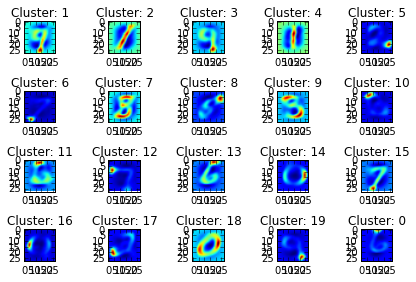

In [62]:
fig = plt.figure()
for i,image in enumerate(means):
    a=fig.add_subplot(4,5,i)
    imgplot = plt.imshow(image.reshape((28,28)))
    a.set_title('Cluster: ' + str(i))
fig.tight_layout()
#     plt.colorbar(ticks=[0.1,0.3,0.5,0.7], orientation ='horizontal')